In [6]:
import os, sys


# Zakładam, że folder 'scripts' jest na tym samym poziomie co 'notebooks'
scripts_path = os.path.abspath(os.path.join('..', 'scripts'))
if scripts_path not in sys.path:
    sys.path.append(scripts_path)

# Teraz możesz importować moduł
import pom
from pom import *

In [7]:
TASKS = [
'alcoholic', 'aldehydic', 'alliaceous', 'almond', 'amber', 'animal',
'anisic', 'apple', 'apricot', 'aromatic', 'balsamic', 'banana', 'beefy',
'bergamot', 'berry', 'bitter', 'black currant', 'brandy', 'burnt',
'buttery', 'cabbage', 'camphoreous', 'caramellic', 'cedar', 'celery',
'chamomile', 'cheesy', 'cherry', 'chocolate', 'cinnamon', 'citrus', 'clean',
'clove', 'cocoa', 'coconut', 'coffee', 'cognac', 'cooked', 'cooling',
'cortex', 'coumarinic', 'creamy', 'cucumber', 'dairy', 'dry', 'earthy',
'ethereal', 'fatty', 'fermented', 'fishy', 'floral', 'fresh', 'fruit skin',
'fruity', 'garlic', 'gassy', 'geranium', 'grape', 'grapefruit', 'grassy',
'green', 'hawthorn', 'hay', 'hazelnut', 'herbal', 'honey', 'hyacinth',
'jasmin', 'juicy', 'ketonic', 'lactonic', 'lavender', 'leafy', 'leathery',
'lemon', 'lily', 'malty', 'meaty', 'medicinal', 'melon', 'metallic',
'milky', 'mint', 'muguet', 'mushroom', 'musk', 'musty', 'natural', 'nutty',
'odorless', 'oily', 'onion', 'orange', 'orangeflower', 'orris', 'ozone',
'peach', 'pear', 'phenolic', 'pine', 'pineapple', 'plum', 'popcorn',
'potato', 'powdery', 'pungent', 'radish', 'raspberry', 'ripe', 'roasted',
'rose', 'rummy', 'sandalwood', 'savory', 'sharp', 'smoky', 'soapy',
'solvent', 'sour', 'spicy', 'strawberry', 'sulfurous', 'sweaty', 'sweet',
'tea', 'terpenic', 'tobacco', 'tomato', 'tropical', 'vanilla', 'vegetable',
'vetiver', 'violet', 'warm', 'waxy', 'weedy', 'winey', 'woody'
]

print("No of tasks: ", len(TASKS))

No of tasks:  138


In [8]:
import pandas as pd
input_file = 'curated_GS_LF_merged_4983.csv' # or new downloaded file path
dataset = pd.read_csv(input_file)
dataset

,curated_GS_LF_merged_4983nonStereoSMILES,descriptors,alcoholic,aldehydic,alliaceous,almond,amber,animal,anisic,apple,...,tropical,vanilla,vegetable,vetiver,violet,warm,waxy,weedy,winey,woody
0,CC(O)CN,fishy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CCC(=O)C(=O)O,fatty;lactonic;sweet;caramellic;creamy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,O=C(O)CCc1ccccc1,rose;floral;fatty;sweet;musk;cinnamon;balsamic,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,OCc1ccc(O)cc1,medicinal;phenolic;fruity;nutty;bitter;sweet;a...,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,O=Cc1ccc(O)cc1,phenolic;woody;nutty;vanilla;hay;metallic;swee...,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,O=c1[nH]cnc2c1ncn2C1OC(COP(=O)([O-])[O-])C(O)C...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4979,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4980,Nc1nc2c(ncn2C2OC(COP(=O)([O-])[O-])C(O)C2O)c(=...,odorless,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4981,CCC1SC(C)=NC(C)S1,alliaceous,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
featurizer = GraphFeaturizer()

smiles_field = 'curated_GS_LF_merged_4983nonStereoSMILES' # column that contains SMILES
loader = dc.data.CSVLoader(tasks=TASKS,
feature_field=smiles_field,
featurizer=featurizer)
dataset = loader.create_dataset(inputs=[input_file])
n_tasks = len(dataset.tasks)
len(dataset)

4983

In [10]:
# get train valid test splits

randomstratifiedsplitter = dc.splits.RandomStratifiedSplitter()
train_dataset, test_dataset, valid_dataset = randomstratifiedsplitter.train_valid_test_split(dataset, frac_train = 0.8, frac_valid = 0.1, frac_test = 0.1, seed = 1)

print("train_dataset: ", len(train_dataset))
print("valid_dataset: ", len(valid_dataset))
print("test_dataset: ", len(test_dataset))

train_dataset:  3999
valid_dataset:  498
test_dataset:  486


In [11]:
train_ratios = get_class_imbalance_ratio(train_dataset)
assert len(train_ratios) == n_tasks

In [12]:
learning_rate = dc.models.optimizers.ExponentialDecay(initial_rate=0.001, decay_rate=0.5, decay_steps=32*20, staircase=True)


In [13]:
# Ustaw parametry zgodnie z tymi z treningu!
model = MPNNPOMModel(
    n_tasks=n_tasks,  # liczba etykiet/zapachów
    batch_size=128,
    learning_rate=0.001,  # lub użyj ExponentialDecay, jeśli stosowałeś
    class_imbalance_ratio=train_ratios,
    loss_aggr_type='sum',
    node_out_feats=100,
    edge_hidden_feats=75,
    edge_out_feats=100,
    num_step_message_passing=5,
    mpnn_residual=True,
    message_aggregator_type='sum',
    mode='classification',
    number_atom_features=GraphConvConstants.ATOM_FDIM,
    number_bond_features=GraphConvConstants.BOND_FDIM,
    n_classes=1,
    readout_type='set2set',
    num_step_set2set=3,
    num_layer_set2set=2,
    ffn_hidden_list=[392, 392],
    ffn_embeddings=256,
    ffn_activation='relu',
    ffn_dropout_p=0.12,
    ffn_dropout_at_input_no_act=False,
    weight_decay=1e-5,
    self_loop=False,
    optimizer_name='adam',
    log_frequency=32,
    model_dir='./experiments',  # katalog, gdzie są checkpointy
    device_name='cpu'  # lub 'cpu'
)

In [14]:
model.restore('experiments/checkpoint2.pt')

c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.loa

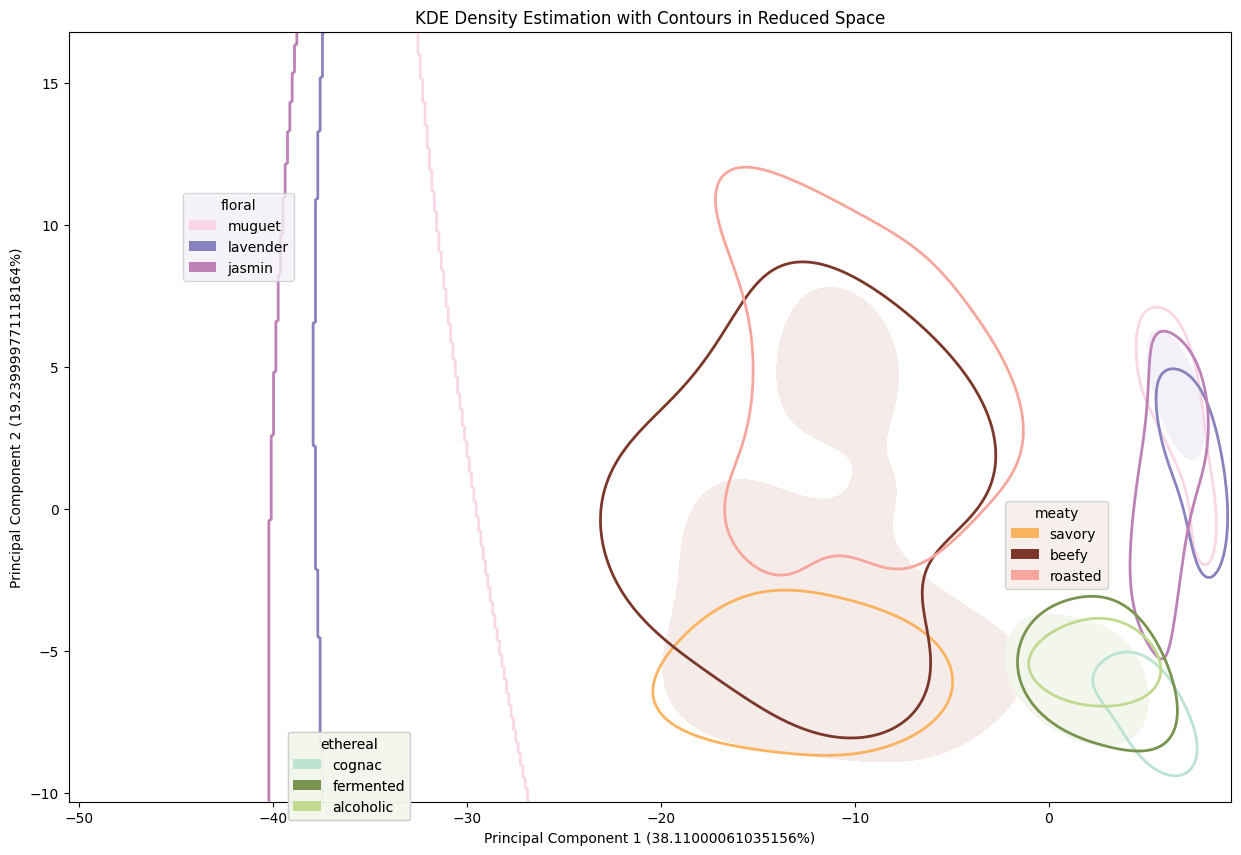

In [15]:
pom.pom_plot(model=model, dataset=dataset, is_preds=False)

In [16]:
odor_clusters = {
    'floral': ['floral', 'jasmin', 'lavender', 'muguet', 'rose', 'chamomile', 'hyacinth', 'lily', 'violet', 'orangeflower', 'geranium'],
    'fruity': ['apple', 'apricot', 'banana', 'berry', 'citrus', 'grapefruit', 'grape', 'melon', 'peach', 'pear', 'pineapple', 'plum', 'raspberry', 'strawberry', 'tropical', 'fruit skin'],
    'spicy': ['cinnamon', 'clove', 'spicy', 'sharp'],
    'woody': ['cedar', 'sandalwood', 'pine', 'vetiver', 'woody'],
    'sweet': ['vanilla', 'caramellic', 'honey', 'sweet', 'buttery', 'creamy', 'milky'],
    'animalic': ['animal', 'musk', 'leathery', 'rummy', 'smoky'],
    'green_herbal': ['grassy', 'green', 'herbal', 'mint', 'leafy', 'hay', 'geranium'],
    'earthy': ['earthy', 'mushroom', 'musty'],
    'chemical': ['solvent', 'phenolic', 'sulfurous', 'medicinal', 'metallic', 'coumarinic'],
    'fresh_citrus': ['lemon', 'orange', 'bergamot', 'fresh', 'cooling'],
    'food_cooked': ['beefy', 'meaty', 'roasted', 'cooked', 'popcorn', 'cheesy', 'coffee', 'cocoa', 'chocolate'],
    'misc': ['alcoholic', 'aldehydic', 'alliaceous', 'onion', 'garlic', 'fishy', 'pungent', 'sour', 'bitter', 'oily', 'sweaty', 'waxy']
}


In [28]:
def cluster_plot(model=model, dataset=dataset, is_preds=False):
   pom_embeds = model.predict_embedding(dataset)
   required_desc = list(dataset.tasks)


   # Define type dictionaries for odor categories to be visualized
   type1 = {
    'sweet': '#F3F1F7',
        'subs': {
        'vanilla': '#F5DEB3',
        'caramellic': '#DEB887',
        'honey': '#FFD700',
        'sweet': '#FFE4B5',
        'buttery': '#FFEBCD',
        'creamy': '#FFF8DC',
        'milky': '#F0FFF0'
    }
}
   type2 = {
    'woody': '#F2F6EC',
    'subs': {
        'cedar': '#BCE2D2',
        'sandalwood': '#79944F',
        'pine': '#C2DA8F',
        'vetiver': '#A9BA9D',
        'woody': '#8F9779'
    }
}
   type3 = {
    'spicy': '#FFF0F5',
    'subs': {
        'cinnamon': '#CD5C5C',
        'clove': '#8B4513',
        'spicy': '#FF6347',
        'sharp': '#FA8072'
    }
}

# type5 = {
#     'sweet': '#FFFACD',
#     'subs': {
#         'vanilla': '#F5DEB3',
#         'caramellic': '#DEB887',
#         'honey': '#FFD700',
#         'sweet': '#FFE4B5',
#         'buttery': '#FFEBCD',
#         'creamy': '#FFF8DC',
#         'milky': '#F0FFF0'
#     }
# }
  
   # Perform Principal Component Analysis (PCA) to reduce the dimensionality of the embeddings to 2 components
   pca = PCA(n_components=2, iterated_power=10)
   reduced_features = pca.fit_transform(pom_embeds)


   # Get the variance explained by the first two principal components
   variance_explained = pca.explained_variance_ratio_
   variance_pc1 = variance_explained[0]
   variance_pc2 = variance_explained[1]


   # If is_preds is True, use the model to make predictions on the dataset
   if is_preds:
       y_preds = model.predict(dataset)
       # Set a threshold for predictions
       threshold = np.percentile(y_preds, 95, axis=0)
       y = (y_preds >= threshold).astype(int)
   else:
       # Otherwise, use the true labels from the dataset
       y = dataset.y


   # Define a grid of points for Kernel Density Estimation (KDE)
   x_grid, y_grid = np.meshgrid(np.linspace(reduced_features[:, 0].min(), reduced_features[:, 0].max(), 500),
                                np.linspace(reduced_features[:, 1].min(), reduced_features[:, 1].max(), 500))
   grid_points = np.vstack([x_grid.ravel(), y_grid.ravel()])


   # Define a function to get KDE values for a specific label
   def get_kde_values(label):
       plot_idx = required_desc.index(label)
       label_indices = np.where(y[:, plot_idx] == 1)[0]
       kde_label = gaussian_kde(reduced_features[label_indices].T)
       kde_values_label = kde_label(grid_points)
       kde_values_label = kde_values_label.reshape(x_grid.shape)
       return kde_values_label
  
   # Define a function to plot contours for a given type dictionary
   def plot_contours(type_dictionary, bbox_to_anchor):
       main_label = list(type_dictionary.keys())[0]
       plt.contourf(x_grid, y_grid, get_kde_values(main_label), levels=1, colors=['#00000000',type_dictionary[main_label],type_dictionary[main_label]])
       legend_elements = []
       for label, color in type_dictionary['subs'].items():
           plt.contour(x_grid, y_grid, get_kde_values(label), levels=1, colors=color, linewidths=2)
           legend_elements.append(Patch(facecolor=color, label=label))
       legend = plt.legend(handles=legend_elements, title=main_label, bbox_to_anchor=bbox_to_anchor)
       legend.get_frame().set_facecolor(type_dictionary[main_label])
       plt.gca().add_artist(legend)


   # Create a figure and plot contours for different types
   plt.figure(figsize=(15, 10))
   plt.title('KDE Density Estimation with Contours in Reduced Space')
   plt.xlabel(f'Principal Component 1 ({round(variance_pc1*100, ndigits=2)}%)')
   plt.ylabel(f'Principal Component 2 ({round(variance_pc2*100, ndigits=2)}%)')
   plot_contours(type_dictionary=type1, bbox_to_anchor = (0.2, 0.8))
   plot_contours(type_dictionary=type2, bbox_to_anchor = (0.9, 0.4))
   plot_contours(type_dictionary=type3, bbox_to_anchor = (0.3, 0.1))


   # Display the plot
   plt.show()
   plt.close()

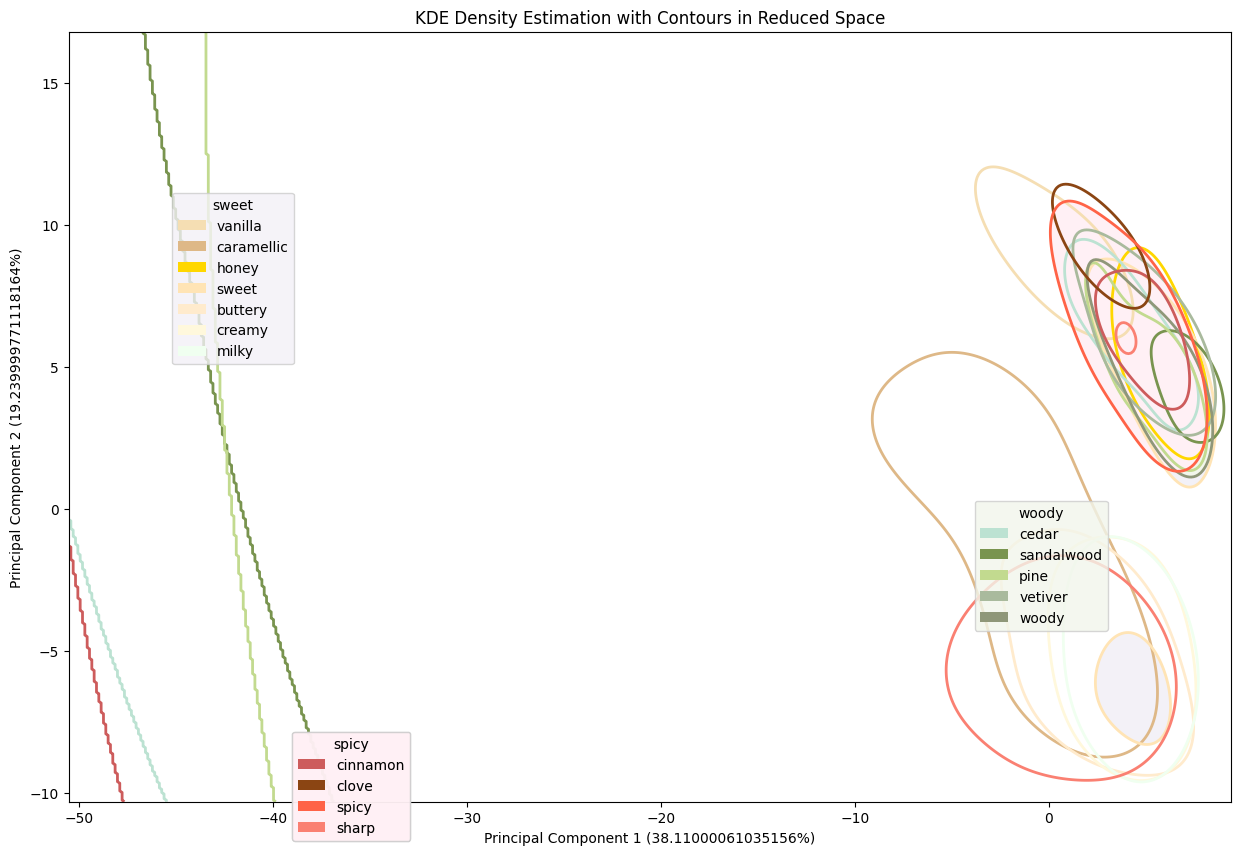

In [29]:
cluster_plot()

In [30]:
pom_embeds = model.predict_embedding(dataset)  # kształt: (n_próbek, n_wymiarów_embeddingu)


In [31]:
from sklearn.cluster import KMeans

# Wybierz liczbę klastrów (np. 10)
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(pom_embeds)

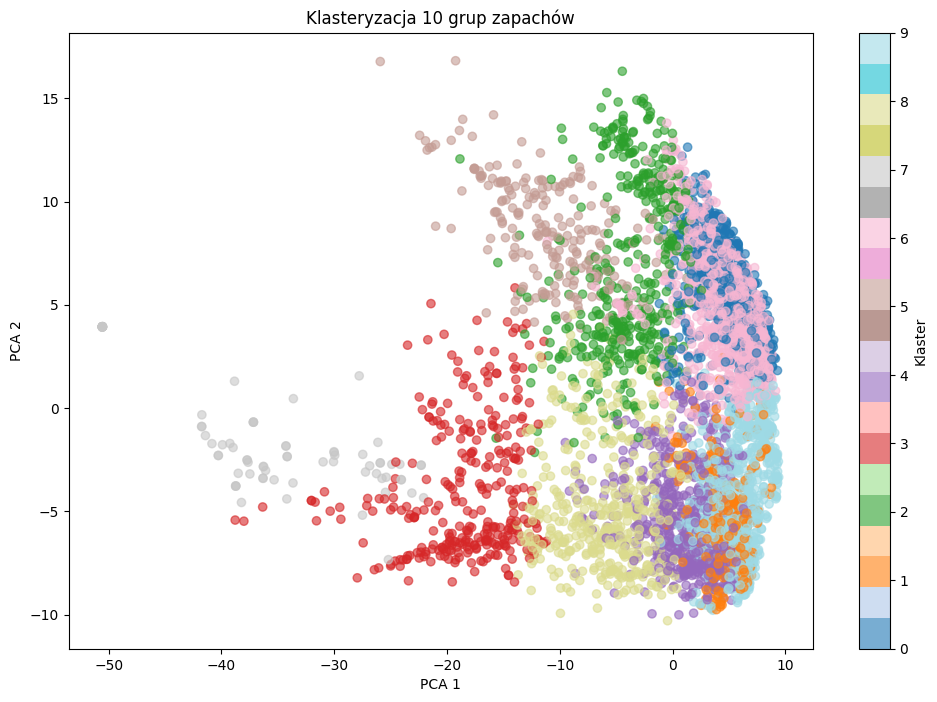

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Redukcja do 2D
pca = PCA(n_components=2)
embeds_2d = pca.fit_transform(pom_embeds)

# Rysuj klastry
plt.figure(figsize=(12, 8))
scatter = plt.scatter(embeds_2d[:, 0], embeds_2d[:, 1], c=clusters, cmap='tab20', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title(f'Klasteryzacja {n_clusters} grup zapachów')
plt.colorbar(scatter, label='Klaster')
plt.show()

c:\Users\mikoo\miniconda3\envs\openpom_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


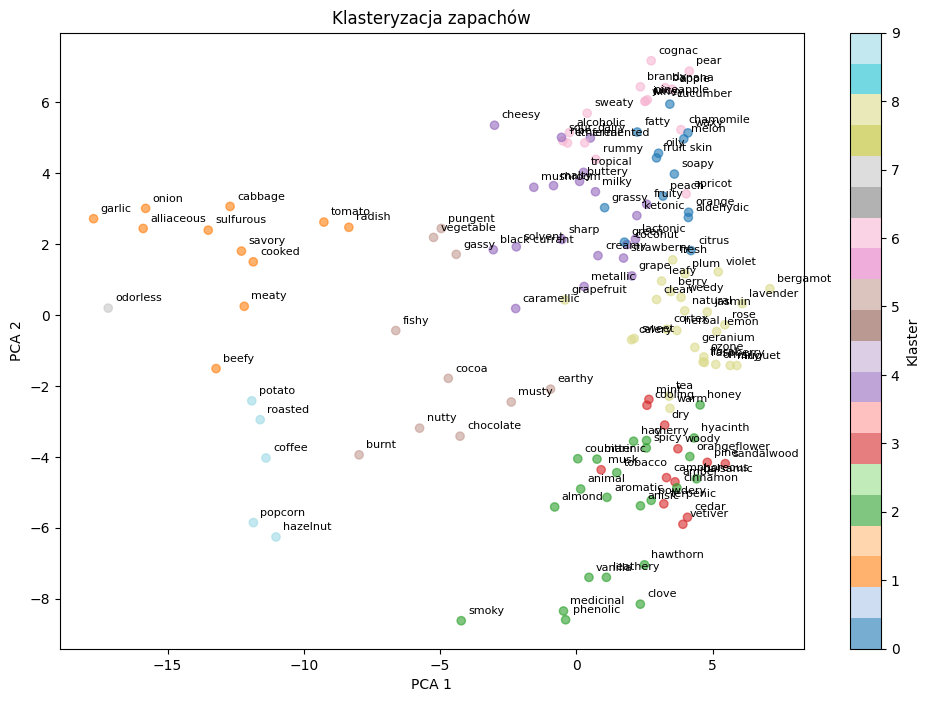

In [40]:
import numpy as np

mean_embeddings = []
for i in range(len(dataset.tasks)):
    idx = np.where(dataset.y[:, i] == 1)[0]
    if len(idx) > 0:
        mean_emb = np.mean(pom_embeds[idx], axis=0)
    else:
        mean_emb = np.zeros(pom_embeds.shape[1])
    mean_embeddings.append(mean_emb)
mean_embeddings = np.array(mean_embeddings)

# Klasteryzacja
from sklearn.cluster import KMeans
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(mean_embeddings)

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeds_2d = pca.fit_transform(mean_embeddings)

# Rysowanie
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
scatter = plt.scatter(embeds_2d[:,0], embeds_2d[:,1], c=clusters, cmap='tab20', alpha=0.6)

for i, label in enumerate(dataset.tasks):
    plt.annotate(label, (embeds_2d[i,0], embeds_2d[i,1]), fontsize=8, xytext=(5,5), textcoords='offset points')

plt.colorbar(scatter, label='Klaster')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Klasteryzacja zapachów')
plt.show()

